# **Homework 0**

## **Intro to your Python Tooklit**

The purpose of this homework is to provide you with the python toolkit you will be using in your homeworks.

Throughout this course, we will heavily rely on the NumPy and PyTorch libraries.

The first library of interest is NumPy.

> NumPy is the fundamental package for scientific computing with Python. It contains among other things:
>
> - a powerful N-dimensional array object
> - sophisticated (broadcasting) functions
> - tools for integrating C/C++ and Fortran code
> - useful linear algebra, Fourier transform, and random number capabilities
> 
> Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.
>
> —*[About NumPy](http://www.numpy.org/)*

The second library of interest is PyTorch.
> PyTorch is an open source deep learning platform that provides a seamless path from research prototyping to production deployment.
> - *Hybrid Front-End:* A new hybrid front-end seamlessly transitions between eager mode and graph mode to provide both flexibility and speed.
> - *Distributed Training:* Scalable distributed training and performance optimization in research and production is enabled by the torch.distributed backend.
> - *Python-First:* Deep integration into Python allows popular libraries and packages to be used for easily writing neural network layers in Python.
> - *Tools & Libraries:* A rich ecosystem of tools and libraries extends PyTorch and supports development in computer vision, NLP and more.
>
> —*[About PyTorch](https://pytorch.org/)*

One consideration as to why we are using PyTorch is most succinctly summerized by Andrej Karpathy, Director of Artificial Intelligence and Autopilot Vision at Tesla. The technical summary can be found [here](https://twitter.com/karpathy/status/868178954032513024?lang=en).

In [1]:
import numpy as np
print(np.__version__)
import os
import time
import torch
print(torch.__version__)

1.19.5
1.7.1+cu101


In [5]:
n_l = 3
n_b = 1
for i in range(n_l - 1, n_b - 1, -1):
  print(i)
# for i in reversed(range(n_l)):
#   print(i)

2
1


Note: If you run into version mismatch errors with Autograd, please ensure you are using the following versions: numpy 1.19.5 ; torch 1.7.0+cu101

If you are using Google Colab, use the following command to install specific version: !pip install numpy==1.19.5 

---

### **1. Interconversion**

PyTorch is an open-source deep learning library for python, and will be the primary framework throughout the course. You can install PyTorch referring to https://PyTorch.org/get-started/locally/. One of the fundamental concepts in PyTorch is the Tensor, a multi-dimensional matrix containing elements of a single type. Tensors are similar to numpy nd-arrays and tensors support most of the functionality that numpy matrices do.

In following exercises, you will familiarize yourself with tensors and more importantly, the PyTorch documentation. It is important to note that for this section we are simply using PyTorch’s tensors as a matrix library, just like numpy. So please do not use functions in torch.nn, like torch.nn.ReLU.

In PyTorch, it is very simple to convert between numpy arrays and tensors. PyTorch’s tensor library provides functions to perform the conversion in either direction.

#### 1.1 Converting from NumPy to PyTorch Tensor
In this task, you will implement a conversion function from arrays to tensors.

The function should take a numpy ndarray and convert it to a PyTorch tensor.

*Function torch.tensor is one of the simple ways to implement it but please do not use it this time. The PyTorch environment installed on Autolab is not an up-to-date version and does not support this function.*

**Your Task**: Implement the function `numpy2tensor`.

In [ ]:
def numpy2tensor(x):
    """
    Creates a torch.Tensor from a numpy.ndarray.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    torch.Tensor: 1-dimensional torch tensor.
    """

    return NotImplemented

##### Test Example:

In [ ]:
X = np.random.randint(-1000, 1000, size=3000)

print(type(numpy2tensor(X)))

<class 'NotImplementedType'>


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> type(numpy2tensor(X)) </b></tt></td> 
        <td style="text-align:left;"><tt> &lt;class &#39;torch.Tensor&#39;&gt; </tt></td> 
    </tr>
</table>

---

#### 1.2 Converting from PyTorch Tensor to NumPy

In this task, you will implement a conversion function from tensors to arrays.

The function should take a PyTorch tensor and convert it to a numpy ndarray.

**Your Task**: Implement the function `tensor2numpy`. 

In [ ]:
def tensor2numpy(x):
    """
    Creates a numpy.ndarray from a torch.Tensor.

    Parameters:
    x (torch.Tensor): 1-dimensional torch tensor.

    Returns:
    numpy.ndarray: 1-dimensional numpy array.
    """

    return NotImplemented

##### Test Example:

In [ ]:
X = np.random.randint(-1000, 1000, size=3000)
X = torch.from_numpy(X)

print(type(tensor2numpy(X)))

**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> type(tensor2numpy(X)) </b></tt></td> 
        <td style="text-align:left;"><tt> &lt;class &#39;numpy.ndarray&#39;&gt; </tt></td> 
    </tr>
</table>

### **2. Vectorization**

Lists are a foundational data structure in Python, allowing us to create simple and complex algorithms to solve problems. However, in mathematics and particularly in linear algebra, we work with vectors and matrices to model problems and create statistical solutions. Through these exercises, we will begin introducing you to how to think more mathematically through the use of NumPy by starting with a process known as vectorization.

Index chasing is a very valuable skill, and certainly one you will need in this course, but mathematical problems often have simpler and more efficient representations that use vectors. The process of converting from an implimentation that uses indicies to one that uses vectors is known as vectorization. Once vectorized, the resulting implementation often yields to the user faster and more readable code than before.

In the following problems, we will ask you to practice reading mathematical expressions and deduce their vectorized equivalent along with their implementation in Python. You will use the NumPy array object as the Python equivalent to a vector, and in later sections you will work with sets of vectors known as matrices.

 **For the following tasks you will be asked to complete the same task first using Numpy Operations, then again using Torch Operations**

---

#### 2.1 Dot Product

In this task, you will implement the dot product function for numpy arrays & torch tensors.

The dot product (also known as the scalar product or inner product) is the linear combination of the n real components of two vectors.

$$x \cdot y = x_1 y_1 + x_2 y_2 + \cdots + x_n y_n$$

**Your Task**: Implement the functions `NUMPY_dot` & `PYTORCH_dot`.

In [ ]:
def EXAMPLE_inefficient_dot(x, y):
    """
    Inefficient dot product of two arrays.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.int64: scalar quantity.
    """    
    assert(len(x) == len(y))
    
    result = 0
    for i in range(len(x)):
        result += x[i]*y[i]
        
    return result

In [ ]:
def NUMPY_dot(x, y):
    """
    Dot product of two arrays.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.int64: scalar quantity.
    """

    return NotImplemented

In [ ]:
def PYTORCH_dot(x, y):
    """
    Dot product of two tensors.

    Parameters: 
    x (torch.Tensor): 1-dimensional torch tensor.
    y (torch.Tensor): 1-dimensional torch tensor.

    Returns: 
    torch.int64: scalar quantity.
    """

    return NotImplemented

##### Test Example:

In [ ]:
np.random.seed(0)
X = np.random.randint(-1000, 1000, size=3000)
Y = np.random.randint(-1000, 1000, size=3000)

print(NUMPY_dot(X,Y))

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
print(PYTORCH_dot(X,Y))

NotImplemented


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> NUMPY_dot(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt> 7082791 </tt></td> 
        <td style="text-align:left;"><tt><b> PYTORCH_dot(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt> 7082791 </tt></td>
    </tr>
</table>

---

#### 2.2 Outer Product

In this task, you will implement the outer product function for numpy arrays & torch tensors.

The outer product (also known as the tensor product) of vectors x and y is defined as

$$
x \otimes y =
\begin{bmatrix}
x_1 y_1 & x_1 y_2 & … & x_1 y_n\\
x_2 y_1 & x_2 y_2 & … & x_2 y_n\\
⋮ & ⋮ & ⋱ & ⋮ \\
x_m y_1 & x_m y_2 & … & x_m y_n
\end{bmatrix}
$$

**Your Task**: Implement the functions `NUMPY_outer` & `PYTORCH_outer`.


In [ ]:
def EXAMPLE_inefficient_outer(x, y):
    """
    Inefficiently compute the outer product of two vectors.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.ndarray: 2-dimensional numpy array.
    """
    result = np.zeros((len(x), len(y))) 
    for i in range(len(x)):
        for j in range(len(y)):
            result[i, j] = x[i]*y[j]
    
    return result

In [ ]:
def NUMPY_outer(x, y):
    """
    Compute the outer product of two vectors.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.ndarray: 2-dimensional numpy array.
    """

    return NotImplemented

In [ ]:
def PYTORCH_outer(x, y):
    """
    Compute the outer product of two vectors.

    Parameters: 
    x (torch.Tensor): 1-dimensional torch tensor.
    y (torch.Tensor): 1-dimensional torch tensor.

    Returns: 
    torch.Tensor: 2-dimensional torch tensor.
    """

    return NotImplemented

##### Test Example:

In [ ]:
np.random.seed(0)
X = np.random.randint(-1000, 1000, size=3000)
Y = np.random.randint(-1000, 1000, size=3000)

print(NUMPY_outer(X,Y))

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
print(PYTORCH_outer(X,Y))

NotImplemented


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> NUMPY_outer(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt> 
            [[&nbsp;&nbsp;59092&nbsp;-144096&nbsp;&nbsp;136512&nbsp;...&nbsp;&nbsp;-53088&nbsp;&nbsp;-86268&nbsp;&nbsp;&nbsp;53404] <br>
            &nbsp;[&nbsp;&nbsp;82467&nbsp;-201096&nbsp;&nbsp;190512&nbsp;...&nbsp;&nbsp;-74088&nbsp;-120393&nbsp;&nbsp;&nbsp;74529] <br>
            &nbsp;[-122111&nbsp;&nbsp;297768&nbsp;-282096&nbsp;...&nbsp;&nbsp;109704&nbsp;&nbsp;178269&nbsp;-110357] <br>
            &nbsp;... <br>
            &nbsp;[-144551&nbsp;&nbsp;352488&nbsp;-333936&nbsp;...&nbsp;&nbsp;129864&nbsp;&nbsp;211029&nbsp;-130637] <br>
            &nbsp;[-179707&nbsp;&nbsp;438216&nbsp;-415152&nbsp;...&nbsp;&nbsp;161448&nbsp;&nbsp;262353&nbsp;-162409] <br>
            &nbsp;[&nbsp;&nbsp;88825&nbsp;-216600&nbsp;&nbsp;205200&nbsp;...&nbsp;&nbsp;-79800&nbsp;-129675&nbsp;&nbsp;&nbsp;80275]] <br>
        </tt></td> 
        <td style="text-align:left;"><tt><b> PYTORCH_outer(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt> 
            [[&nbsp;&nbsp;59092&nbsp;-144096&nbsp;&nbsp;136512&nbsp;...&nbsp;&nbsp;-53088&nbsp;&nbsp;-86268&nbsp;&nbsp;&nbsp;53404] <br>
            &nbsp;[&nbsp;&nbsp;82467&nbsp;-201096&nbsp;&nbsp;190512&nbsp;...&nbsp;&nbsp;-74088&nbsp;-120393&nbsp;&nbsp;&nbsp;74529] <br>
            &nbsp;[-122111&nbsp;&nbsp;297768&nbsp;-282096&nbsp;...&nbsp;&nbsp;109704&nbsp;&nbsp;178269&nbsp;-110357] <br>
            &nbsp;... <br>
            &nbsp;[-144551&nbsp;&nbsp;352488&nbsp;-333936&nbsp;...&nbsp;&nbsp;129864&nbsp;&nbsp;211029&nbsp;-130637] <br>
            &nbsp;[-179707&nbsp;&nbsp;438216&nbsp;-415152&nbsp;...&nbsp;&nbsp;161448&nbsp;&nbsp;262353&nbsp;-162409] <br>
            &nbsp;[&nbsp;&nbsp;88825&nbsp;-216600&nbsp;&nbsp;205200&nbsp;...&nbsp;&nbsp;-79800&nbsp;-129675&nbsp;&nbsp;&nbsp;80275]] <br>
        </tt></td> 
    </tr>
</table>

---

#### 2.3 Hadamard Product

In this task, you will implement the Hadamard product function, `multiply`, for numpy arrays & torch tensors.

The Hadamard product (also known as the Schur product or entrywise product) of vectors x and y is defined as

$$
x \circ y =
\begin{bmatrix}
x_{1} y_{1} & x_{2} y_{2} & … & x_{n} y_{n}
\end{bmatrix}
$$

**Your Task**: Implement the functions `NUMPY_multiply` & `PYTORCH_multiply`.

In [ ]:
def EXAMPLE_inefficient_multiply(x, y):
    """
    Inefficiently multiply arguments element-wise.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.ndarray: 1-dimensional numpy array.
    """
    assert(len(x) == len(y))
    
    result = np.zeros(len(x))
    for i in range(len(x)):
        result[i] = x[i]*y[i]
    
    return result

In [ ]:
def NUMPY_multiply(x, y):
    """
    Multiply arguments element-wise.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.ndarray: 1-dimensional numpy array.
    """

    return NotImplemented

In [ ]:
def PYTORCH_multiply(x, y):
    """
    Multiply arguments element-wise.

    Parameters: 
    x (torch.Tensor): 1-dimensional torch tensor.
    y (torch.Tensor): 1-dimensional torch tensor.

    Returns: 
    torch.Tensor: 1-dimensional torch tensor.
    """

    return NotImplemented

##### Test Example:

In [ ]:
np.random.seed(0)
X = np.random.randint(-1000, 1000, size=3000)
Y = np.random.randint(-1000, 1000, size=3000)

print(NUMPY_multiply(X,Y))

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
print(PYTORCH_multiply(X,Y))

NotImplemented


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> NUMPY_multiply(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [&nbsp;&nbsp;59092&nbsp;-201096&nbsp;-282096&nbsp;...&nbsp;&nbsp;129864&nbsp;&nbsp;262353&nbsp;&nbsp;&nbsp;80275]
        </tt></td> 
        <td style="text-align:left;"><tt><b> PYTORCH_multiply(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [&nbsp;&nbsp;59092&nbsp;-201096&nbsp;-282096&nbsp;...&nbsp;&nbsp;129864&nbsp;&nbsp;262353&nbsp;&nbsp;&nbsp;80275]
        </tt></td> 
    </tr>
</table>

---

#### 2.4 Sum-Product
In this task, you will implement the sum-product function for numpy arrays & torch tensors.

The sum-product of vectors x and y, each with n real component, is defined as 

$$
f(x, y) = 
{
\begin{bmatrix}
1\\
1\\
⋮\\
1
\end{bmatrix}^{\;T}
%
\begin{bmatrix}
x_1 y_1 & x_1 y_2 & … & x_1 y_n\\
x_2 y_1 & x_2 y_2 & … & x_2 y_n\\
⋮ & ⋮ & ⋱ & ⋮ \\
x_m y_1 & x_m y_2 & … & x_m y_n
\end{bmatrix}
%
\begin{bmatrix}
1\\
1\\
⋮\\
1
\end{bmatrix}
} = 
\displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=1}^{n} x_i \cdot y_j
$$

**Your Task**: Implement the functions `NUMPY_sumproduct` & `PYTORCH_sumproduct`.


In [ ]:
def EXAMPLE_inefficient_sumproduct(x, y):
    """
    Inefficiently sum over all the dimensions of the outer product 
    of two vectors.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.int64: scalar quantity.
    """
    assert(len(x) == len(y))
    
    result = 0
    for i in range(len(x)):
        for j in range(len(y)):
            result += x[i] * y[j]
            
    return result

In [ ]:
def NUMPY_sumproduct(x, y):
    """
    Sum over all the dimensions of the outer product of two vectors.

    Parameters: 
    x (numpy.ndarray): 1-dimensional numpy array.
    y (numpy.ndarray): 1-dimensional numpy array.

    Returns: 
    numpy.int64: scalar quantity.
    """

    return NotImplemented

In [ ]:
def PYTORCH_sumproduct(x, y):
    """
    Sum over all the dimensions of the outer product of two vectors.

    Parameters: 
    x (torch.Tensor): 1-dimensional torch tensor.
    y (torch.Tensor): 1-dimensional torch tensor.

    Returns: 
    torch.int64: scalar quantity.
    """

    return NotImplemented

##### Test Example:

In [ ]:
np.random.seed(0)
X = np.random.randint(-1000, 1000, size=3000)
Y = np.random.randint(-1000, 1000, size=3000)

print(NUMPY_sumproduct(X,Y))

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
print(PYTORCH_sumproduct(X,Y))

NotImplemented


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> NUMPY_sumproduct(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt> 265421520 </tt></td> 
        <td style="text-align:left;"><tt><b> TORCH_sumproduct(X,Y) </b></tt></td> 
        <td style="text-align:left;"><tt> 265421520 </tt></td> 
    </tr>
</table>

---

#### 2.5 ReLU

In this task, you will implement the ReLU activation function for numpy arrays and torch tensors.

The ReLU activation (also known as the rectifier or rectified linear unit) matrix Z resulting from applying the ReLU function to matrix X is defined such that for $X,Z \in M_{m \times n} (\mathbb{R})$, 

$$Z = {\tt ReLU}(X) \implies \begin{cases}z_{ij} = x_{ij}&{\mbox{if }}x_{ij}>0\\z_{ij} = 0&{\mbox{otherwise.}}\end{cases}$$

For reference, it is common to use the notation $X = (x_{ij})$ and $Z = (z_{ij})$.

**Your Task:** Implement the functions `NUMPY_ReLU` & `PYTORCH_ReLU`.

In [ ]:
def EXAMPLE_inefficient_ReLU(x):
    """
    Inefficiently applies the rectified linear unit function 
    element-wise.

    Parameters: 
    x (numpy.ndarray): 2-dimensional numpy array.

    Returns: 
    numpy.ndarray: 2-dimensional numpy array.
    """
    result = np.copy(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] < 0:
                result[i][j] = 0
                
    return result

In [ ]:
def NUMPY_ReLU(x):
    """
    Applies the rectified linear unit function element-wise.

    Parameters: 
    x (numpy.ndarray): 2-dimensional numpy array.

    Returns: 
    numpy.ndarray: 2-dimensional numpy array.
    """

    return NotImplemented

In [ ]:
def PYTORCH_ReLU(x):
    """
    Applies the rectified linear unit function element-wise.

    Parameters: 
    x (torch.Tensor): 2-dimensional torch tensor.

    Returns: 
    torch.Tensor: 2-dimensional torch tensor.
    """

    return NotImplemented

##### Test Example:

In [ ]:
np.random.seed(0)
X = np.random.randint(-1000, 1000, size=(3000,3000))

print(NUMPY_ReLU(X))

X = torch.from_numpy(X)
print(PYTORCH_ReLU(X))

NotImplemented


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> NUMPY_ReLU(X) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0&nbsp;653&nbsp;...&nbsp;773&nbsp;961&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;[&nbsp;&nbsp;0&nbsp;456&nbsp;&nbsp;&nbsp;0&nbsp;...&nbsp;168&nbsp;273&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;[936&nbsp;475&nbsp;&nbsp;&nbsp;0&nbsp;...&nbsp;408&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;... <br>
&nbsp;[&nbsp;&nbsp;0&nbsp;396&nbsp;457&nbsp;...&nbsp;646&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;[645&nbsp;943&nbsp;&nbsp;&nbsp;0&nbsp;...&nbsp;863&nbsp;&nbsp;&nbsp;0&nbsp;790] <br>
&nbsp;[641&nbsp;&nbsp;&nbsp;0&nbsp;379&nbsp;...&nbsp;347&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0]]
        </tt></td> 
        <td style="text-align:left;"><tt><b> PYTORCH_ReLU(X) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0&nbsp;653&nbsp;...&nbsp;773&nbsp;961&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;[&nbsp;&nbsp;0&nbsp;456&nbsp;&nbsp;&nbsp;0&nbsp;...&nbsp;168&nbsp;273&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;[936&nbsp;475&nbsp;&nbsp;&nbsp;0&nbsp;...&nbsp;408&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;... <br>
&nbsp;[&nbsp;&nbsp;0&nbsp;396&nbsp;457&nbsp;...&nbsp;646&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0] <br>
&nbsp;[645&nbsp;943&nbsp;&nbsp;&nbsp;0&nbsp;...&nbsp;863&nbsp;&nbsp;&nbsp;0&nbsp;790] <br>
&nbsp;[641&nbsp;&nbsp;&nbsp;0&nbsp;379&nbsp;...&nbsp;347&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;0]]
        </tt></td> 
    </tr>
</table>

---

#### 2.6 Prime ReLU (derivative of ReLU)

In this task, you will implement the derivative of the ReLU activation function for numpy arrays and torch tensors.

The derivative of the ReLU activation matrix Z resulting from applying the derivative of the ReLU function to matrix X is defined such that for $X,Z \in M_{m \times n} (\mathbb{R})$, 

$$Z = {\tt PrimeReLU}(X) \implies \begin{cases}z_{ij} = \frac{d}{dx_{ij}} (x_{ij})&{\mbox{if }}x_{ij}> 0\\z_{ij} = \frac{d}{dx_{ij}} (0)&{\mbox{otherwise.}}\end{cases}$$

For reference, it is common to use the notation $X = (x_{ij})$ and $Z = (z_{ij})$.

**Your Task:** Implement the functions `NUMPY_PrimeReLU` & `PYTORCH_PrimeReLU`.

In [ ]:
def EXAMPLE_inefficient_PrimeReLU(x):
    """
    Inefficiently applies the derivative of the rectified linear unit 
    function element-wise.

    Parameters: 
    x (numpy.ndarray): 2-dimensional numpy array.

    Returns: 
    numpy.ndarray: 2-dimensional numpy array.
    """

    result = np.copy(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] <= 0:
                result[i][j] = 0
            else:
                result[i][j] = 1
                
    return result

In [ ]:
def NUMPY_PrimeReLU(x):
    """
    Applies the derivative of the rectified linear unit function 
    element-wise.

    Parameters: 
    x (numpy.ndarray): 2-dimensional numpy array.

    Returns: 
    numpy.ndarray: 2-dimensional numpy array.
    """

    return NotImplemented

In [ ]:
def PYTORCH_PrimeReLU(x):
    """
    Applies derivative of the rectified linear unit function 
    element-wise.

    Parameters: 
    x (torch.Tensor): 2-dimensional torch tensor.

    Returns: 
    torch.Tensor: 2-dimensional torch tensor.
    """

    return NotImplemented

##### Test Example:

In [ ]:
np.random.seed(0)
X = np.random.randint(-1000, 1000, size=(3000,3000))

print(NUMPY_PrimeReLU(X))

X = torch.from_numpy(X)
print(PYTORCH_PrimeReLU(X))

NotImplemented


**Expected Output**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> NUMPY_PrimeReLU(X) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[0&nbsp;0&nbsp;1&nbsp;...&nbsp;1&nbsp;1&nbsp;0] <br>
&nbsp;[0&nbsp;1&nbsp;0&nbsp;...&nbsp;1&nbsp;1&nbsp;0] <br>
&nbsp;[1&nbsp;1&nbsp;0&nbsp;...&nbsp;1&nbsp;0&nbsp;0] <br>
&nbsp;... <br>
&nbsp;[0&nbsp;1&nbsp;1&nbsp;...&nbsp;1&nbsp;0&nbsp;0] <br>
&nbsp;[1&nbsp;1&nbsp;0&nbsp;...&nbsp;1&nbsp;0&nbsp;1] <br>
&nbsp;[1&nbsp;0&nbsp;1&nbsp;...&nbsp;1&nbsp;0&nbsp;0]]
        </tt></td>
        <td style="text-align:left;"><tt><b> PYTORCH_PrimeReLU(X) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[0&nbsp;0&nbsp;1&nbsp;...&nbsp;1&nbsp;1&nbsp;0] <br>
&nbsp;[0&nbsp;1&nbsp;0&nbsp;...&nbsp;1&nbsp;1&nbsp;0] <br>
&nbsp;[1&nbsp;1&nbsp;0&nbsp;...&nbsp;1&nbsp;0&nbsp;0] <br>
&nbsp;... <br>
&nbsp;[0&nbsp;1&nbsp;1&nbsp;...&nbsp;1&nbsp;0&nbsp;0] <br>
&nbsp;[1&nbsp;1&nbsp;0&nbsp;...&nbsp;1&nbsp;0&nbsp;1] <br>
&nbsp;[1&nbsp;0&nbsp;1&nbsp;...&nbsp;1&nbsp;0&nbsp;0]]
        </tt></td> 
    </tr>
</table>

---

[link text](https://)## 3. Pre-processing
When working with mathematical objects, there are often strict requirements on their contents such as dimension or set membership. This allows us to make proofs and conclusions about given objects, which motivate our mathematical models. However, data often not collected in a way that is consistent with our desired requirements.

In this problem, you will be introduced to two types of data that will frequently be used in this course: univariate time-series data and multivariate time-series data. Your goal will be to process the given data such that its result is consistent with some requirements. Though the motivation behind these requirements may not yet be clear, they will, needless to say, become useful later in the course.

For your implimentation, we encourage you to make use of NumPy to [slice](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) and to [pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html) data.

In [ ]:
def get_data_1():
    """
    This is the generating process from which example data 1 will derive
    
    Parameters: 
    None
    
    Returns: 
    numpy.ndarray: 1-d numpy array with 2-d numpy arrays as elements.
    """
    freq000 = 3; freq001 = 1; freq002 = 4; freq003 = 1
    freq010 = 5; freq011 = 9; freq012 = 2; freq013 = 6
    freq020 = 5; freq021 = 3; freq022 = 5; freq023 = 8
    frame00 = np.array([freq000, freq001, freq002, freq003])
    frame01 = np.array([freq010, freq011, freq012, freq013])
    frame02 = np.array([freq020, freq021, freq022, freq023])
    utterance0 = np.array([frame00, frame01, frame02])

    freq100 = 9; freq101 = 7; freq102 = 9; freq103 = 3
    freq110 = 2; freq111 = 3; freq112 = 8; freq113 = 4
    frame10 = np.array([freq100, freq101, freq102, freq103])
    frame11 = np.array([freq110, freq111, freq112, freq113])
    utterance1 = np.array([frame10, frame11])

    freq200 = 6; freq201 = 2; freq202 = 6; freq203 = 4
    freq210 = 3; freq211 = 3; freq212 = 8; freq213 = 3
    freq220 = 2; freq221 = 7; freq222 = 9; freq223 = 5
    freq230 = 0; freq231 = 2; freq232 = 8; freq233 = 8
    frame20 = np.array([freq200, freq201, freq202, freq203])
    frame21 = np.array([freq210, freq211, freq212, freq213])
    frame22 = np.array([freq220, freq221, freq222, freq223])
    frame23 = np.array([freq230, freq231, freq232, freq233])
    utterance2 = np.array([frame20, frame21, frame22, frame23])

    spectrograms = np.array([utterance0, utterance1, utterance2])

    return spectrograms

def get_data_2():
    """
    This is the generating process from which example data 2 will derive
    
    Parameters: 
    None
    
    Returns: 
    numpy.ndarray: 1-d numpy array with 2-d numpy arrays as elements.
    """
    np.random.seed(0)
    recordings = np.random.randint(10)
    durations = [np.random.randint(low=5, high=10) 
                 for i in range(recordings)]
    data = []
    k = 40 # Given as fixed constant
    for duration in durations:
        data.append(np.random.randint(10, size=(duration, k)))
    data = np.asarray(data)
    return data

##### Example 1 Data:

<img src="images/ex3.png" width="600">

<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> get_data_1() </b></tt></td> 
        <td style="text-align:left;"><tt>
[array([[3,&nbsp;1,&nbsp;4,&nbsp;1], <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5,&nbsp;9,&nbsp;2,&nbsp;6], <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5,&nbsp;3,&nbsp;5,&nbsp;8]]) <br>
&nbsp;array([[9,&nbsp;7,&nbsp;9,&nbsp;3], <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2,&nbsp;3,&nbsp;8,&nbsp;4]]) <br>
&nbsp;array([[6,&nbsp;2,&nbsp;6,&nbsp;4], <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3,&nbsp;3,&nbsp;8,&nbsp;3], <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2,&nbsp;7,&nbsp;9,&nbsp;5], <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[0,&nbsp;2,&nbsp;8,&nbsp;8]])]
        </tt></td> 
    </tr>
</table>

---

### **3. Pre-processing**
When working with mathematical objects, there are often strict requirements on their contents such as dimension or set membership. This allows us to make proofs and conclusions about given objects, which motivate our mathematical models. However, data often not collected in a way that is consistent with our desired requirements.

In this problem, you will be introduced to two types of data that will frequently be used in this course: univariate time-series data and multivariate time-series data. Your goal will be to process the given data such that its result is consistent with some requirements. Though the motivation behind these requirements may not yet be clear, they will, needless to say, become useful later in the course.

 For your implementation, we encourage you to make use of NumPy to [slice](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) and to [pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html) data.

In [ ]:
def get_data_1():
    """
    This is the generating process from which example data 1 will derive
    
    Parameters: 
    None
    
    Returns: 
    numpy.ndarray: 1-d numpy array with 2-d numpy arrays as elements.
    """
    freq000 = 3; freq001 = 1; freq002 = 4; freq003 = 1
    freq010 = 5; freq011 = 9; freq012 = 2; freq013 = 6
    freq020 = 5; freq021 = 3; freq022 = 5; freq023 = 8
    frame00 = np.array([freq000, freq001, freq002, freq003])
    frame01 = np.array([freq010, freq011, freq012, freq013])
    frame02 = np.array([freq020, freq021, freq022, freq023])
    utterance0 = np.array([frame00, frame01, frame02])

    freq100 = 9; freq101 = 7; freq102 = 9; freq103 = 3
    freq110 = 2; freq111 = 3; freq112 = 8; freq113 = 4
    frame10 = np.array([freq100, freq101, freq102, freq103])
    frame11 = np.array([freq110, freq111, freq112, freq113])
    utterance1 = np.array([frame10, frame11])

    freq200 = 6; freq201 = 2; freq202 = 6; freq203 = 4
    freq210 = 3; freq211 = 3; freq212 = 8; freq213 = 3
    freq220 = 2; freq221 = 7; freq222 = 9; freq223 = 5
    freq230 = 0; freq231 = 2; freq232 = 8; freq233 = 8
    frame20 = np.array([freq200, freq201, freq202, freq203])
    frame21 = np.array([freq210, freq211, freq212, freq213])
    frame22 = np.array([freq220, freq221, freq222, freq223])
    frame23 = np.array([freq230, freq231, freq232, freq233])
    utterance2 = np.array([frame20, frame21, frame22, frame23])

    spectrograms = np.array([utterance0, utterance1, utterance2])

    return spectrograms

def get_data_2():
    """
    This is the generating process from which example data 2 will derive
    
    Parameters: 
    None
    
    Returns: 
    numpy.ndarray: 1-d numpy array with 2-d numpy arrays as elements.
    """
    np.random.seed(0)
    recordings = np.random.randint(10)
    durations = [np.random.randint(low=5, high=10) 
                 for i in range(recordings)]
    data = []
    k = 40 # Given as fixed constant
    for duration in durations:
        data.append(np.random.randint(10, size=(duration, k)))
    data = np.asarray(data)
    return data

#### Example 1 Data:

<img src="images/ex3.png" width="600">

---

#### 3.1 Slicing: Last Point
Takes one 3-dimensional array with the length of the output instances. Your task is to keep only the $m$ last frames for each instance in the dataset. 

To the extent that it is helpful, a formal description provided in the Appendix.

**Your Task:** Implement the function `slice_last_point`.

In [ ]:
def slice_last_point(x, m):
    """
    Takes one 3-dimensional array with the length of the output instances.
    Your task is to keep only the last m points for each instances in 
    the dataset.

    Parameters: 
    x (numpy.ndarray): 1-d numpy array with 2-d numpy arrays as elements (n, ?, k). 
    m (int): The cutoff reference index in dimension 2.
  
    Returns: 
    numpy.ndarray: A 3-dimensional numpy array of shape (n, m, k)
    """
    spectrograms = x
    
    # Input function dimension specification
    assert(spectrograms.ndim == 1)
    for utter in spectrograms:
        assert(utter.ndim == 2)

    # Pre-define output function dimension specification
    dim1 = spectrograms.shape[0]    # n
    dim2 = m                       # m
    dim3 = spectrograms[0].shape[1] # k

    result = np.zeros((dim1,dim2,dim3))

    #### Start of your code ####

    
    ####  End of your code  ####

    # Assert output function dimension specification
    assert(result.shape[0] == dim1)
    assert(result.shape[1] == dim2)
    assert(result.shape[2] == dim3)
    
    return result

##### Example 1:

In [ ]:
spectrograms = get_data_1()
duration = 2
print(slice_last_point(spectrograms, duration))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


##### Expected Output 1

<img src="images/ex3-1.png" width="600">

<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> slice_last_point(<br>spectrograms, duration) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[[5.&nbsp;9.&nbsp;2.&nbsp;6.] <br>
&nbsp;&nbsp;[5.&nbsp;3.&nbsp;5.&nbsp;8.]] <br>

&nbsp;[[9.&nbsp;7.&nbsp;9.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;3.&nbsp;8.&nbsp;4.]] <br>

&nbsp;[[2.&nbsp;7.&nbsp;9.&nbsp;5.] <br>
&nbsp;&nbsp;[0.&nbsp;2.&nbsp;8.&nbsp;8.]]] <br>
        </tt></td> 
    </tr>
</table>

##### Example 2:

In [ ]:
data = get_data_2()
m = 5
print(slice_last_point(data, m)[1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Expected Output 2**: 
<table style = "align:40%"  >
    <tr>
        <td style="text-align:left;"><tt><b> slice_last_point(<br>data, m)[1] </b></tt></td> 
        <td style="text-align:left;"><tt>
[[7.&nbsp;2.&nbsp;7.&nbsp;1.&nbsp;6.&nbsp;5.&nbsp;0.&nbsp;0.&nbsp;3.&nbsp;1.&nbsp;9.&nbsp;9.&nbsp;6.&nbsp;6.&nbsp;7.&nbsp;8.&nbsp;8.&nbsp;7.&nbsp;0.&nbsp;8.&nbsp;6.&nbsp;8.&nbsp;9.&nbsp;8. <br>
&nbsp;&nbsp;3.&nbsp;6.&nbsp;1.&nbsp;7.&nbsp;4.&nbsp;9.&nbsp;2.&nbsp;0.&nbsp;8.&nbsp;2.&nbsp;7.&nbsp;8.&nbsp;4.&nbsp;4.&nbsp;1.&nbsp;7.] <br>
&nbsp;[6.&nbsp;9.&nbsp;4.&nbsp;1.&nbsp;5.&nbsp;9.&nbsp;7.&nbsp;1.&nbsp;3.&nbsp;5.&nbsp;7.&nbsp;3.&nbsp;6.&nbsp;6.&nbsp;7.&nbsp;9.&nbsp;1.&nbsp;9.&nbsp;6.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;4.&nbsp;1. <br>
&nbsp;&nbsp;4.&nbsp;5.&nbsp;0.&nbsp;3.&nbsp;1.&nbsp;4.&nbsp;4.&nbsp;4.&nbsp;0.&nbsp;0.&nbsp;8.&nbsp;4.&nbsp;6.&nbsp;9.&nbsp;3.&nbsp;3.] <br>
&nbsp;[2.&nbsp;1.&nbsp;2.&nbsp;1.&nbsp;3.&nbsp;4.&nbsp;1.&nbsp;1.&nbsp;0.&nbsp;7.&nbsp;8.&nbsp;4.&nbsp;3.&nbsp;5.&nbsp;6.&nbsp;3.&nbsp;2.&nbsp;9.&nbsp;8.&nbsp;1.&nbsp;4.&nbsp;0.&nbsp;8.&nbsp;3. <br>
&nbsp;&nbsp;9.&nbsp;5.&nbsp;5.&nbsp;1.&nbsp;7.&nbsp;8.&nbsp;6.&nbsp;4.&nbsp;7.&nbsp;3.&nbsp;5.&nbsp;3.&nbsp;6.&nbsp;4.&nbsp;7.&nbsp;3.] <br>
&nbsp;[0.&nbsp;5.&nbsp;9.&nbsp;3.&nbsp;7.&nbsp;5.&nbsp;5.&nbsp;8.&nbsp;0.&nbsp;8.&nbsp;3.&nbsp;6.&nbsp;9.&nbsp;3.&nbsp;2.&nbsp;7.&nbsp;0.&nbsp;3.&nbsp;0.&nbsp;3.&nbsp;6.&nbsp;1.&nbsp;9.&nbsp;2. <br>
&nbsp;&nbsp;9.&nbsp;4.&nbsp;9.&nbsp;1.&nbsp;3.&nbsp;2.&nbsp;4.&nbsp;9.&nbsp;7.&nbsp;4.&nbsp;9.&nbsp;4.&nbsp;1.&nbsp;2.&nbsp;7.&nbsp;2.] <br>
&nbsp;[3.&nbsp;9.&nbsp;7.&nbsp;6.&nbsp;6.&nbsp;2.&nbsp;3.&nbsp;6.&nbsp;0.&nbsp;8.&nbsp;0.&nbsp;7.&nbsp;6.&nbsp;5.&nbsp;9.&nbsp;6.&nbsp;5.&nbsp;2.&nbsp;7.&nbsp;1.&nbsp;9.&nbsp;2.&nbsp;2.&nbsp;5. <br>
&nbsp;&nbsp;6.&nbsp;4.&nbsp;2.&nbsp;2.&nbsp;1.&nbsp;0.&nbsp;9.&nbsp;0.&nbsp;2.&nbsp;8.&nbsp;3.&nbsp;0.&nbsp;8.&nbsp;8.&nbsp;1.&nbsp;0.]]
        </tt></td> 
    </tr>
</table>

---

#### 3.2 Slicing: Fixed Point
Takes one 3-dimensional array with the starting position and the length of the output instances. Your task is to slice the instances from the same starting position for the given length.

To the extent that it is helpful, a formal description provided in the Appendix.

**Your Task:** Implement the function `slice_fixed_point`.

In [ ]:
def slice_fixed_point(x, s, m):
    """
    Takes one 3-dimensional array with the starting position and the 
    length of the output instances. Your task is to slice the instances 
    from the same starting position for the given length.

    Parameters:
    x (numpy.ndarray): 1-d numpy array with 2-d numpy arrays as elements (n, ?, k).
    s (int): The starting reference index in dimension 2.
    m (int): The cutoff reference index in dimension 2.
    
    Returns:
    numpy.ndarray: A 3-dimensional int numpy array of shape (n, m-s, k)
    """
    spectrograms = x
    
    # Input function dimension specification
    assert(spectrograms.ndim == 1)
    for utter in spectrograms:
        assert(utter.ndim == 2)

    # Pre-define output function dimension specification
    dim1 = spectrograms.shape[0]     # n
    dim2 = m-s                      # m-s
    dim3 = spectrograms[0].shape[1]  # k

    result = np.zeros((dim1,dim2,dim3))

    #### Start of your code ####

    
    ####  End of your code  ####

    # Assert output function dimension specification
    assert(result.shape[0] == dim1)
    assert(result.shape[1] == dim2)
    assert(result.shape[2] == dim3)
    
    return result

##### Test Example 1:

In [ ]:
spectrograms = get_data_1()
start = 0
end = 2
print(slice_fixed_point(spectrograms, start, end))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


##### Expected Output 1

<img src="images/ex3-2.png" width="600">

<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> slice_fixed_point(<br>spectrograms, start, end) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[[3.&nbsp;1.&nbsp;4.&nbsp;1.] <br>
&nbsp;&nbsp;[5.&nbsp;9.&nbsp;2.&nbsp;6.]] <br>

&nbsp;[[9.&nbsp;7.&nbsp;9.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;3.&nbsp;8.&nbsp;4.]] <br>

&nbsp;[[6.&nbsp;2.&nbsp;6.&nbsp;4.] <br>
&nbsp;&nbsp;[3.&nbsp;3.&nbsp;8.&nbsp;3.]]] <br>
        </tt></td> 
    </tr>
</table>

##### Test Example 2:

In [ ]:
data = get_data_2()
s = 2
m = 5
print(slice_fixed_point(data, s, m)[1])

**Expected Output 2**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> slice_fixed_point(<br>data, s, m)[1] </b></tt></td> 
        <td style="text-align:left;"><tt>
[[8.&nbsp;7.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;7.&nbsp;7.&nbsp;1.&nbsp;8.&nbsp;4.&nbsp;7.&nbsp;0.&nbsp;4.&nbsp;9.&nbsp;0.&nbsp;6.&nbsp;4.&nbsp;2.&nbsp;4.&nbsp;6.&nbsp;3.&nbsp;3.&nbsp;7.&nbsp;8. <br>
&nbsp;&nbsp;5.&nbsp;0.&nbsp;8.&nbsp;5.&nbsp;4.&nbsp;7.&nbsp;4.&nbsp;1.&nbsp;3.&nbsp;3.&nbsp;9.&nbsp;2.&nbsp;5.&nbsp;2.&nbsp;3.&nbsp;5.] <br>
&nbsp;[7.&nbsp;2.&nbsp;7.&nbsp;1.&nbsp;6.&nbsp;5.&nbsp;0.&nbsp;0.&nbsp;3.&nbsp;1.&nbsp;9.&nbsp;9.&nbsp;6.&nbsp;6.&nbsp;7.&nbsp;8.&nbsp;8.&nbsp;7.&nbsp;0.&nbsp;8.&nbsp;6.&nbsp;8.&nbsp;9.&nbsp;8. <br>
&nbsp;&nbsp;3.&nbsp;6.&nbsp;1.&nbsp;7.&nbsp;4.&nbsp;9.&nbsp;2.&nbsp;0.&nbsp;8.&nbsp;2.&nbsp;7.&nbsp;8.&nbsp;4.&nbsp;4.&nbsp;1.&nbsp;7.] <br>
&nbsp;[6.&nbsp;9.&nbsp;4.&nbsp;1.&nbsp;5.&nbsp;9.&nbsp;7.&nbsp;1.&nbsp;3.&nbsp;5.&nbsp;7.&nbsp;3.&nbsp;6.&nbsp;6.&nbsp;7.&nbsp;9.&nbsp;1.&nbsp;9.&nbsp;6.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;4.&nbsp;1. <br>
&nbsp;&nbsp;4.&nbsp;5.&nbsp;0.&nbsp;3.&nbsp;1.&nbsp;4.&nbsp;4.&nbsp;4.&nbsp;0.&nbsp;0.&nbsp;8.&nbsp;4.&nbsp;6.&nbsp;9.&nbsp;3.&nbsp;3.]]
        </tt></td> 
    </tr>
</table>

---

#### 3.3 Slicing: Random Point
Takes one 3-dimensional array with the length of the output instances. Your task is to slice the instances from a random point in each of the utterances with the given length. Please use function `numpy.random.randint` for generating the starting position.

To the extent that it is helpful, a formal description provided in the Appendix.

**Your Task:** Implement the function `slice_random_point`.

In [ ]:
def slice_random_point(x, d):
    """
    Takes one 3-dimensional array with the length of the output instances.
    Your task is to slice the instances from a random point in each of the
    utterances with the given length. Please use offset and refer to their 
    mathematical correspondance.

    Parameters: 
    x (numpy.ndarray): 1-d numpy array with 2-d numpy arrays as elements (n, ?, k).
    d (int): The resulting size of the data in dimension 2.
    
    Returns: 
    numpy.ndarray: A 3-dimensional int numpy array of shape (n, d, k)
    """
    spectrograms = x
    
    # Input function dimension specification
    assert(spectrograms.ndim == 1)
    for utter in spectrograms:
        assert(utter.ndim == 2)
        assert(utter.shape[0] >= d)

    offset = [np.random.randint(utter.shape[0]-d+1)
              if utter.shape[0]-d > 0 else 0
              for utter in spectrograms]

    # Pre-define output function dimension specification
    dim1 = spectrograms.shape[0]    # n
    dim2 = d                       # d
    dim3 = spectrograms[0].shape[1] # k

    result = np.zeros((dim1,dim2,dim3))

    #### Start of your code ####

    
    
    
    ####  End of your code  ####

    # Assert output function dimension specification
    assert(result.shape[0] == dim1)
    assert(result.shape[1] == dim2)
    assert(result.shape[2] == dim3)
    
    return result

##### Test Example 1:

In [ ]:
np.random.seed(1)
spectrograms = get_data_1()
duration = 2
print(slice_random_point(spectrograms, duration))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


##### Expected Output 1

<img src="images/ex3-3.png" width="600">

<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> slice_random_point(<br>spectrograms, duration) </b></tt></td> 
        <td style="text-align:left;"><tt>
            [[[5.&nbsp;9.&nbsp;2.&nbsp;6.] <br>
&nbsp;&nbsp;[5.&nbsp;3.&nbsp;5.&nbsp;8.]] <br>

&nbsp;[[9.&nbsp;7.&nbsp;9.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;3.&nbsp;8.&nbsp;4.]] <br>

&nbsp;[[6.&nbsp;2.&nbsp;6.&nbsp;4.] <br>
&nbsp;&nbsp;[3.&nbsp;3.&nbsp;8.&nbsp;3.]]] <br>
        </tt></td> 
    </tr>
</table>

##### Test Example 2:

In [ ]:
data = get_data_2()
d = 4
print(slice_random_point(data, d)[1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Expected Output 2**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> slice_random_point(<br>data, d)[1] </b></tt></td> 
        <td style="text-align:left;"><tt>
[[3.&nbsp;3.&nbsp;7.&nbsp;9.&nbsp;9.&nbsp;9.&nbsp;7.&nbsp;3.&nbsp;2.&nbsp;3.&nbsp;9.&nbsp;7.&nbsp;7.&nbsp;5.&nbsp;1.&nbsp;2.&nbsp;2.&nbsp;8.&nbsp;1.&nbsp;5.&nbsp;8.&nbsp;4.&nbsp;0.&nbsp;2. <br>
&nbsp;&nbsp;5.&nbsp;5.&nbsp;0.&nbsp;8.&nbsp;1.&nbsp;1.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;8.&nbsp;4.&nbsp;4.&nbsp;0.&nbsp;9.&nbsp;3.&nbsp;7.] <br>
&nbsp;[3.&nbsp;2.&nbsp;1.&nbsp;1.&nbsp;2.&nbsp;1.&nbsp;4.&nbsp;2.&nbsp;5.&nbsp;5.&nbsp;5.&nbsp;2.&nbsp;5.&nbsp;7.&nbsp;7.&nbsp;6.&nbsp;1.&nbsp;6.&nbsp;7.&nbsp;2.&nbsp;3.&nbsp;1.&nbsp;9.&nbsp;5. <br>
&nbsp;&nbsp;9.&nbsp;9.&nbsp;2.&nbsp;0.&nbsp;9.&nbsp;1.&nbsp;9.&nbsp;0.&nbsp;6.&nbsp;0.&nbsp;4.&nbsp;8.&nbsp;4.&nbsp;3.&nbsp;3.&nbsp;8.] <br>
&nbsp;[8.&nbsp;7.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;7.&nbsp;7.&nbsp;1.&nbsp;8.&nbsp;4.&nbsp;7.&nbsp;0.&nbsp;4.&nbsp;9.&nbsp;0.&nbsp;6.&nbsp;4.&nbsp;2.&nbsp;4.&nbsp;6.&nbsp;3.&nbsp;3.&nbsp;7.&nbsp;8. <br>
&nbsp;&nbsp;5.&nbsp;0.&nbsp;8.&nbsp;5.&nbsp;4.&nbsp;7.&nbsp;4.&nbsp;1.&nbsp;3.&nbsp;3.&nbsp;9.&nbsp;2.&nbsp;5.&nbsp;2.&nbsp;3.&nbsp;5.] <br>
&nbsp;[7.&nbsp;2.&nbsp;7.&nbsp;1.&nbsp;6.&nbsp;5.&nbsp;0.&nbsp;0.&nbsp;3.&nbsp;1.&nbsp;9.&nbsp;9.&nbsp;6.&nbsp;6.&nbsp;7.&nbsp;8.&nbsp;8.&nbsp;7.&nbsp;0.&nbsp;8.&nbsp;6.&nbsp;8.&nbsp;9.&nbsp;8. <br>
&nbsp;&nbsp;3.&nbsp;6.&nbsp;1.&nbsp;7.&nbsp;4.&nbsp;9.&nbsp;2.&nbsp;0.&nbsp;8.&nbsp;2.&nbsp;7.&nbsp;8.&nbsp;4.&nbsp;4.&nbsp;1.&nbsp;7.]]
        </tt></td> 
    </tr>
</table>

---

#### 3.4 Padding: Ending Pattern
Takes one 3-dimensional array. Your task is to pad the instances from the end position as shown in the example below. That is, you need to pad the reflection of the utterance mirrored along the edge values of the array.

To the extent that it is helpful, a formal description provided in the Appendix.

**Your Task:** Implement the function `pad_ending_pattern`.

In [ ]:
def pad_ending_pattern(x):
    """
    Takes one 3-dimensional array. Your task is to pad the instances from 
    the end position as shown in the example below. That is, you need to 
    pads with the reflection of the vector mirrored along the edge of the array.
    
    Parameters: 
    x (numpy.ndarray): 1-d numpy array with 2-d numpy arrays as elements.
    
    Returns: 
    numpy.ndarray: 3-dimensional int numpy array
    """
    spectrograms = x
    
    # Input function dimension specification
    assert(spectrograms.ndim == 1)
    for utter in spectrograms:
        assert(utter.ndim == 2)

    # Pre-define output function dimension specification
    dim1 = spectrograms.shape[0]    # n
    dim2 = max([utter.shape[0] for utter in spectrograms]) # m
    dim3 = spectrograms[0].shape[1] # k

    result = np.zeros((dim1, dim2, dim3))

    #### Start of your code ####

    
    
    ####  End of your code  ####

    # Assert output function dimension specification
    assert(result.shape[0] == dim1)
    assert(result.shape[1] == dim2)
    assert(result.shape[2] == dim3)
    
    return result

##### Test Example 1:

In [ ]:
spectrograms = get_data_1()
duration = 2
print(pad_ending_pattern(spectrograms))

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


##### Expected Output 1
<img src="images/ex3-4.png" width="600">

<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> pad_ending_pattern(spectrograms) </b></tt></td> 
        <td style="text-align:left;"><tt>
[[[3.&nbsp;1.&nbsp;4.&nbsp;1.] <br>
&nbsp;&nbsp;[5.&nbsp;9.&nbsp;2.&nbsp;6.] <br>
&nbsp;&nbsp;[5.&nbsp;3.&nbsp;5.&nbsp;8.] <br>
&nbsp;&nbsp;[5.&nbsp;3.&nbsp;5.&nbsp;8.]] <br>

&nbsp;[[9.&nbsp;7.&nbsp;9.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;3.&nbsp;8.&nbsp;4.] <br>
&nbsp;&nbsp;[2.&nbsp;3.&nbsp;8.&nbsp;4.] <br>
&nbsp;&nbsp;[9.&nbsp;7.&nbsp;9.&nbsp;3.]] <br>

&nbsp;[[6.&nbsp;2.&nbsp;6.&nbsp;4.] <br>
&nbsp;&nbsp;[3.&nbsp;3.&nbsp;8.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;7.&nbsp;9.&nbsp;5.] <br>
&nbsp;&nbsp;[0.&nbsp;2.&nbsp;8.&nbsp;8.]]]
        </tt></td> 
    </tr>
</table>

##### Test Example 2:

In [ ]:
data = get_data_2()
print(pad_ending_pattern(data)[4])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

**Expected Output 2**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> pad_ending_pattern(<br>data)[4] </b></tt></td> 
        <td style="text-align:left;"><tt>
[[8.&nbsp;2.&nbsp;4.&nbsp;3.&nbsp;1.&nbsp;6.&nbsp;5.&nbsp;8.&nbsp;4.&nbsp;3.&nbsp;6.&nbsp;5.&nbsp;3.&nbsp;7.&nbsp;8.&nbsp;8.&nbsp;3.&nbsp;7.&nbsp;8.&nbsp;5.&nbsp;7.&nbsp;2.&nbsp;7.&nbsp;8. <br>
&nbsp;&nbsp;0.&nbsp;7.&nbsp;4.&nbsp;8.&nbsp;4.&nbsp;4.&nbsp;0.&nbsp;4.&nbsp;8.&nbsp;0.&nbsp;0.&nbsp;4.&nbsp;7.&nbsp;3.&nbsp;7.&nbsp;7.] <br>
&nbsp;[2.&nbsp;2.&nbsp;1.&nbsp;7.&nbsp;0.&nbsp;7.&nbsp;5.&nbsp;9.&nbsp;7.&nbsp;1.&nbsp;1.&nbsp;2.&nbsp;4.&nbsp;1.&nbsp;4.&nbsp;5.&nbsp;8.&nbsp;2.&nbsp;1.&nbsp;6.&nbsp;3.&nbsp;0.&nbsp;3.&nbsp;9. <br>
&nbsp;&nbsp;5.&nbsp;1.&nbsp;3.&nbsp;7.&nbsp;1.&nbsp;1.&nbsp;7.&nbsp;9.&nbsp;4.&nbsp;2.&nbsp;0.&nbsp;3.&nbsp;2.&nbsp;4.&nbsp;0.&nbsp;0.] <br>
&nbsp;[9.&nbsp;3.&nbsp;8.&nbsp;3.&nbsp;0.&nbsp;4.&nbsp;4.&nbsp;0.&nbsp;2.&nbsp;5.&nbsp;5.&nbsp;8.&nbsp;2.&nbsp;7.&nbsp;3.&nbsp;6.&nbsp;1.&nbsp;0.&nbsp;2.&nbsp;2.&nbsp;5.&nbsp;5.&nbsp;1.&nbsp;2. <br>
&nbsp;&nbsp;8.&nbsp;7.&nbsp;3.&nbsp;7.&nbsp;3.&nbsp;1.&nbsp;0.&nbsp;1.&nbsp;0.&nbsp;8.&nbsp;8.&nbsp;5.&nbsp;3.&nbsp;3.&nbsp;1.&nbsp;0.] <br>
&nbsp;[6.&nbsp;1.&nbsp;6.&nbsp;9.&nbsp;5.&nbsp;7.&nbsp;0.&nbsp;1.&nbsp;4.&nbsp;9.&nbsp;5.&nbsp;1.&nbsp;6.&nbsp;5.&nbsp;4.&nbsp;4.&nbsp;4.&nbsp;7.&nbsp;2.&nbsp;2.&nbsp;6.&nbsp;5.&nbsp;3.&nbsp;0. <br>
&nbsp;&nbsp;8.&nbsp;8.&nbsp;1.&nbsp;8.&nbsp;7.&nbsp;5.&nbsp;7.&nbsp;9.&nbsp;4.&nbsp;0.&nbsp;7.&nbsp;2.&nbsp;3.&nbsp;9.&nbsp;5.&nbsp;4.] <br>
&nbsp;[0.&nbsp;4.&nbsp;5.&nbsp;8.&nbsp;1.&nbsp;4.&nbsp;8.&nbsp;0.&nbsp;1.&nbsp;1.&nbsp;8.&nbsp;9.&nbsp;4.&nbsp;9.&nbsp;0.&nbsp;3.&nbsp;0.&nbsp;7.&nbsp;0.&nbsp;8.&nbsp;1.&nbsp;2.&nbsp;8.&nbsp;5. <br>
&nbsp;&nbsp;8.&nbsp;2.&nbsp;1.&nbsp;3.&nbsp;5.&nbsp;0.&nbsp;2.&nbsp;5.&nbsp;8.&nbsp;6.&nbsp;2.&nbsp;7.&nbsp;7.&nbsp;1.&nbsp;8.&nbsp;4.] <br>
&nbsp;[9.&nbsp;3.&nbsp;3.&nbsp;2.&nbsp;9.&nbsp;0.&nbsp;4.&nbsp;6.&nbsp;4.&nbsp;3.&nbsp;2.&nbsp;3.&nbsp;1.&nbsp;1.&nbsp;2.&nbsp;7.&nbsp;2.&nbsp;7.&nbsp;0.&nbsp;1.&nbsp;8.&nbsp;0.&nbsp;5.&nbsp;2. <br>
&nbsp;&nbsp;8.&nbsp;0.&nbsp;4.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;1.&nbsp;6.&nbsp;4.&nbsp;6.&nbsp;9.&nbsp;6.&nbsp;4.&nbsp;7.&nbsp;2.&nbsp;9.] <br>
&nbsp;[9.&nbsp;3.&nbsp;3.&nbsp;2.&nbsp;9.&nbsp;0.&nbsp;4.&nbsp;6.&nbsp;4.&nbsp;3.&nbsp;2.&nbsp;3.&nbsp;1.&nbsp;1.&nbsp;2.&nbsp;7.&nbsp;2.&nbsp;7.&nbsp;0.&nbsp;1.&nbsp;8.&nbsp;0.&nbsp;5.&nbsp;2. <br>
&nbsp;&nbsp;8.&nbsp;0.&nbsp;4.&nbsp;0.&nbsp;3.&nbsp;8.&nbsp;1.&nbsp;6.&nbsp;4.&nbsp;6.&nbsp;9.&nbsp;6.&nbsp;4.&nbsp;7.&nbsp;2.&nbsp;9.] <br>
&nbsp;[0.&nbsp;4.&nbsp;5.&nbsp;8.&nbsp;1.&nbsp;4.&nbsp;8.&nbsp;0.&nbsp;1.&nbsp;1.&nbsp;8.&nbsp;9.&nbsp;4.&nbsp;9.&nbsp;0.&nbsp;3.&nbsp;0.&nbsp;7.&nbsp;0.&nbsp;8.&nbsp;1.&nbsp;2.&nbsp;8.&nbsp;5. <br>
&nbsp;&nbsp;8.&nbsp;2.&nbsp;1.&nbsp;3.&nbsp;5.&nbsp;0.&nbsp;2.&nbsp;5.&nbsp;8.&nbsp;6.&nbsp;2.&nbsp;7.&nbsp;7.&nbsp;1.&nbsp;8.&nbsp;4.]]
        </tt></td> 
    </tr>
</table>

---

#### 3.5 Padding: Constant Central Pattern
Takes one 3-dimensional array with the constant value of padding. Your task is to pad the instances with the given constant value while maintaining the array at the center of the padding.

To the extent that it is helpful, a formal description provided in the Appendix.

**Your Task:** Implement the function `pad_constant_central_pattern`.

In [ ]:
def pad_constant_central_pattern(x, cval):
    """
    Takes one 3-dimensional array with the constant value of padding. 
    Your task is to pad the instances with the given constant value while
    maintaining the array at the center of the padding.

    Parameters: 
    x (numpy.ndarray): 1-d numpy array with 2-d numpy arrays as elements.
    cval (numpy.int64): scalar quantity.
    
    Returns: 
    numpy.ndarray: 3-dimensional int numpy array, (n, m, k).
    """
    spectrograms = x
    
    # Input function dimension specification
    assert(spectrograms.ndim == 1)
    for utter in spectrograms:
        assert(utter.ndim == 2)

    dim1 = spectrograms.shape[0]    # n
    dim2 = max([utter.shape[0] for utter in spectrograms]) # m
    dim3 = spectrograms[0].shape[1] # k

    result = np.ones((dim1,dim2,dim3))

    #### Start of your code ####

    
    
    
    
    
    ####  End of your code  ####

    # Assert output function dimension specification
    assert(result.shape[0] == dim1)
    assert(result.shape[1] == dim2)
    assert(result.shape[2] == dim3)
    
    return result

##### Test Example 1:

In [ ]:
spectrograms = get_data_1()
duration = 2
print(pad_constant_central_pattern(spectrograms, 0))

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


##### Expected Output 1

<img src="images/ex3-5.png" width="600">

<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> pad_constant_central_pattern(spectrograms, 0) </b></tt></td> 
        <td style="text-align:left;"><tt>
[[[3.&nbsp;1.&nbsp;4.&nbsp;1.] <br>
&nbsp;&nbsp;[5.&nbsp;9.&nbsp;2.&nbsp;6.] <br>
&nbsp;&nbsp;[5.&nbsp;3.&nbsp;5.&nbsp;8.] <br>
&nbsp;&nbsp;[0.&nbsp;0.&nbsp;0.&nbsp;0.]] <br>

&nbsp;[[0.&nbsp;0.&nbsp;0.&nbsp;0.] <br>
&nbsp;&nbsp;[9.&nbsp;7.&nbsp;9.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;3.&nbsp;8.&nbsp;4.] <br>
&nbsp;&nbsp;[0.&nbsp;0.&nbsp;0.&nbsp;0.]] <br>

&nbsp;[[6.&nbsp;2.&nbsp;6.&nbsp;4.] <br>
&nbsp;&nbsp;[3.&nbsp;3.&nbsp;8.&nbsp;3.] <br>
&nbsp;&nbsp;[2.&nbsp;7.&nbsp;9.&nbsp;5.] <br>
&nbsp;&nbsp;[0.&nbsp;2.&nbsp;8.&nbsp;8.]]]
        </tt></td> 
    </tr>
</table>

##### Test Example 2:

In [ ]:
data = get_data_2()
print(pad_constant_central_pattern(data, cval = 0)[0])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

**Expected Output 2**: 
<table style = "align:40%">
    <tr>
        <td style="text-align:left;"><tt><b> pad_constant_central_pattern(<br>data, cval = 0)[0] </b></tt></td> 
        <td style="text-align:left;"><tt>
[[0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0. <br>
&nbsp;&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.] <br>
&nbsp;[3.&nbsp;5.&nbsp;2.&nbsp;4.&nbsp;7.&nbsp;6.&nbsp;8.&nbsp;8.&nbsp;1.&nbsp;6.&nbsp;7.&nbsp;7.&nbsp;8.&nbsp;1.&nbsp;5.&nbsp;9.&nbsp;8.&nbsp;9.&nbsp;4.&nbsp;3.&nbsp;0.&nbsp;3.&nbsp;5.&nbsp;0. <br>
&nbsp;&nbsp;2.&nbsp;3.&nbsp;8.&nbsp;1.&nbsp;3.&nbsp;3.&nbsp;3.&nbsp;7.&nbsp;0.&nbsp;1.&nbsp;9.&nbsp;9.&nbsp;0.&nbsp;4.&nbsp;7.&nbsp;3.] <br>
&nbsp;[2.&nbsp;7.&nbsp;2.&nbsp;0.&nbsp;0.&nbsp;4.&nbsp;5.&nbsp;5.&nbsp;6.&nbsp;8.&nbsp;4.&nbsp;1.&nbsp;4.&nbsp;9.&nbsp;8.&nbsp;1.&nbsp;1.&nbsp;7.&nbsp;9.&nbsp;9.&nbsp;3.&nbsp;6.&nbsp;7.&nbsp;2. <br>
&nbsp;&nbsp;0.&nbsp;3.&nbsp;5.&nbsp;9.&nbsp;4.&nbsp;4.&nbsp;6.&nbsp;4.&nbsp;4.&nbsp;3.&nbsp;4.&nbsp;4.&nbsp;8.&nbsp;4.&nbsp;3.&nbsp;7.] <br>
&nbsp;[5.&nbsp;5.&nbsp;0.&nbsp;1.&nbsp;5.&nbsp;9.&nbsp;3.&nbsp;0.&nbsp;5.&nbsp;0.&nbsp;1.&nbsp;2.&nbsp;4.&nbsp;2.&nbsp;0.&nbsp;3.&nbsp;2.&nbsp;0.&nbsp;7.&nbsp;5.&nbsp;9.&nbsp;0.&nbsp;2.&nbsp;7. <br>
&nbsp;&nbsp;2.&nbsp;9.&nbsp;2.&nbsp;3.&nbsp;3.&nbsp;2.&nbsp;3.&nbsp;4.&nbsp;1.&nbsp;2.&nbsp;9.&nbsp;1.&nbsp;4.&nbsp;6.&nbsp;8.&nbsp;2.] <br>
&nbsp;[3.&nbsp;0.&nbsp;0.&nbsp;6.&nbsp;0.&nbsp;6.&nbsp;3.&nbsp;3.&nbsp;8.&nbsp;8.&nbsp;8.&nbsp;2.&nbsp;3.&nbsp;2.&nbsp;0.&nbsp;8.&nbsp;8.&nbsp;3.&nbsp;8.&nbsp;2.&nbsp;8.&nbsp;4.&nbsp;3.&nbsp;0. <br>
&nbsp;&nbsp;4.&nbsp;3.&nbsp;6.&nbsp;9.&nbsp;8.&nbsp;0.&nbsp;8.&nbsp;5.&nbsp;9.&nbsp;0.&nbsp;9.&nbsp;6.&nbsp;5.&nbsp;3.&nbsp;1.&nbsp;8.] <br>
&nbsp;[0.&nbsp;4.&nbsp;9.&nbsp;6.&nbsp;5.&nbsp;7.&nbsp;8.&nbsp;8.&nbsp;9.&nbsp;2.&nbsp;8.&nbsp;6.&nbsp;6.&nbsp;9.&nbsp;1.&nbsp;6.&nbsp;8.&nbsp;8.&nbsp;3.&nbsp;2.&nbsp;3.&nbsp;6.&nbsp;3.&nbsp;6. <br>
&nbsp;&nbsp;5.&nbsp;7.&nbsp;0.&nbsp;8.&nbsp;4.&nbsp;6.&nbsp;5.&nbsp;8.&nbsp;2.&nbsp;3.&nbsp;9.&nbsp;7.&nbsp;5.&nbsp;3.&nbsp;4.&nbsp;5.] <br>
&nbsp;[0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0. <br>
&nbsp;&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.] <br>
&nbsp;[0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0. <br>
&nbsp;&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.&nbsp;0.]]
        </tt></td> 
    </tr>
</table>

## **Recursion :**

---

**Exercise :**

Implement a Fibonacci sequence is the integer sequence of 0, 1, 1, 2, 3, 5, 8 and so on using Recursion.

The first two terms are 0 and 1. All other terms are obtained by adding the preceding two terms.This means to say the nth term is the sum of (n-1)th and (n-2)th term.

In [ ]:
def recur_fibo(n):
   #Implement the recursive call escape statement 
     #Write your code here
     pass
   #Implement the recursive call
    #Write your code here
     pass

nterms = 10

# check if the number of terms is valid
if nterms <= 0:
   print("Plese enter a positive integer")
else:
   print("Fibonacci sequence:")
   for i in range(nterms):
       print(recur_fibo(i)) 

Fibonacci sequence:
None
None
None
None
None
None
None
None
None
None


### **Depth-first search (DFS) with Recursion**: 

---

It is an algorithm for tree traversal on graph or tree data structures. It can be implemented easily using recursion and data structures like dictionaries and sets.

The Algorithm:
*  Pick any node. If it is unvisited, mark it as visited and recur on all its adjacent nodes.
*  Repeat until all the nodes are visited, or the node to be searched is found.

We will implement this DFS :
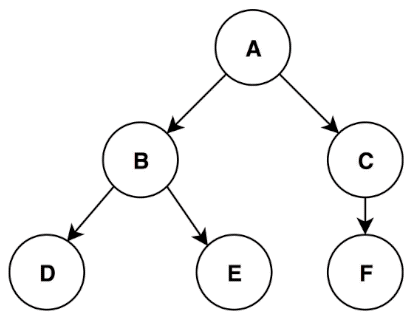


#### **Exercise** : 

Implement the DFS inorder traversal shown above

**Expected Output** : ABDECF 


In [ ]:
# Using a Python dictionary to act as an adjacency list
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : [],
    'F' : []
}

visited = set() # Set to keep track of visited nodes.

def dfs(visited, graph, node):

    pass
  

dfs(visited, graph, 'A')